In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.io import loadmat
%matplotlib inline

In [5]:
data = loadmat('../Data/ex5data1.mat')

In [7]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

The data describes change in water levels (X) and the amount of water leaving a dam (y). It is split into training data, cross-validation data (\_val) and testing data (\_test).

In [8]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

In [17]:
X     = np.c_[np.ones((X.shape[0],1)),     X]
Xval  = np.c_[np.ones((Xval.shape[0],1)),  Xval]
Xtest = np.c_[np.ones((Xtest.shape[0],1)), Xtest]

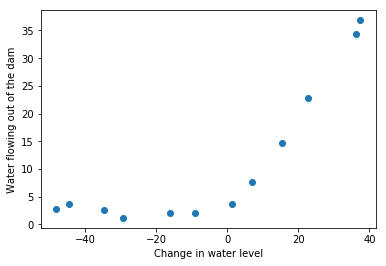

In [11]:
plt.scatter(X,y)
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.show()

It might work best to just do it with raw code, instead of the sklearn implementation, so I'll start with that. Most of the work was done in EX2 already, just have to change it from logistic to linear.

In [12]:
def costFunctionRegularization(X,y,thetas, lamda): #intentional misspelling
    #Expect X to be bias-offset. (i.e. X = [1, X])
    m = X.shape[0]
    J = (1/m)*np.sum((X@thetas-y)**2) + (lamda/(2*m))*np.sum(thetas[:,1:]**2)
    return J

def gradientDescentRegularization(X, y, alpha = 0.01, lamda = 1, iterations = 100):
    m = X.shape[0]
    num_j = X.shape[1]
    thetas = np.zeros((num_j,1))
    new_thetas = np.zeros_like(thetas)
    J_list = []
    for _ in range(iterations):
        grad = X.T@(X@thetas - y) + lamda*thetas*(np.c_[np.arange(num_j)]>=1)
        thetas -= alpha*grad/m
        J_list.append(costFunctionRegularization(X,y,thetas,lamda))
    return thetas, J_list

In [40]:
thetas,J_list = gradientDescentRegularization(X,y,alpha = .002,iterations=2000, lamda=0)

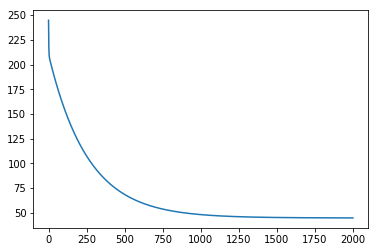

In [41]:
plt.plot(J_list)
plt.show()

Because I don't want to bother regularizing the dataset in this very manual methodology, it's taking a bit longer to converge. But at least it still runs nearly instantaneously.

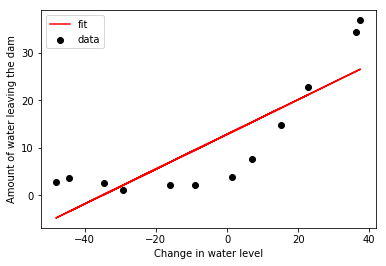

In [42]:
plt.scatter(X[:,1],y,c='k', label='data')
plt.plot(X[:,1],X@thetas,c='r',label='fit')
plt.legend()
plt.xlabel('Change in water level')
plt.ylabel('Amount of water leaving the dam')
plt.show()

For a linear fit, the regularization wasn't useful, but I anticipate adding some polynomial features since right now we have high bias.

## Making some learning curves

In [45]:
import time
from IPython.display import clear_output

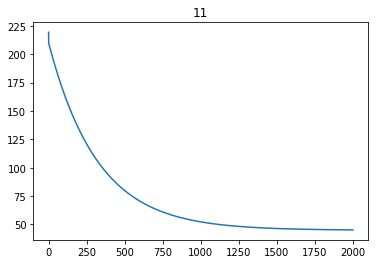

In [62]:
J_train_curve, J_val_curve = ([],[])
curve_count = range(X.shape[1]+1,X.shape[0])
for i in curve_count:
    clear_output(wait=True)
    thetas,J_list = gradientDescentRegularization(X[:(i+1),:].reshape(-1,2),y[:(i+1)].reshape(-1,1),alpha = .0016,iterations=2000, lamda=0)
    plt.plot(J_list)
    plt.title(i)
    plt.show()
    J_train_curve.append(J_list[-1])
    J_val_curve.append(costFunctionRegularization(Xval,yval.reshape(-1,1),thetas,lamda=0))
    #time.sleep(1/2)

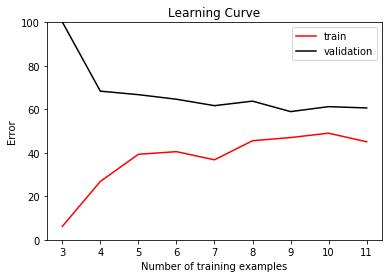

In [65]:
plt.plot(curve_count,J_train_curve,c='r',label='train')
plt.plot(curve_count,J_val_curve,c='k',label='validation')
plt.legend()
plt.ylim((0,100))
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.show()

So it looks like our validation and training data don't even get that close with a full set of data, and they don't appear to be getting any closer with more data. Even more reason to believe that the data is biased/underfit.